# Documentation on sequences of events
Conny Lin | June 4, 2020


In [4]:
pCapstone = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data'

# Questions
* Can I predict which worm is on ethanol plate by it's behavior before the first tap?
* Can I predict which worm is on ethanol plate by it's behavior?
* Can I predict which worm is on ethanol plate by it's image and behavior?
* Can I predict which tap number the worm is reacting to by it's behavior before and after the tap? 
    * for wildtype
    * for ethanol vs non ethanol
    * for mutants?

---

* VPD intoxication data
* recommender system for aromatherapy, inventory suggestions based on formula 
* network analysis of aromatherapy receipes to find relationships
* can machine learn out to put together ingredients for aromatherapy? (should be the same as cooking)
* take a picture of the fridge and output dinner receipe today

# libraries

[How to run other scripts?](https://stackoverflow.com/questions/2349991/python-how-to-import-other-python-files/20749411#20749411)

There are more than a few ways. I'll list them in order of inverted preference (i.e., best first, worst last):
* make packages (see here: https://docs.python.org/dev/tutorial/modules.html#packages)
* Treat it like a module: import file. This is good because it's secure, fast, and maintainable. Code gets reused as it's supposed to be done. Most Python libraries run using multiple methods stretched over lots of files. Highly recommended. Note that if your file is called file.py, your import should not include the .py extension at the end.
* The infamous (and unsafe) exec command: Insecure, hacky, usually the wrong answer. Avoid where possible.
    `execfile('file.py')` in Python 2
    `exec(open('file.py').read())` in Python 3
* Spawn a shell process: os.system('python file.py'). Use when desperate.

In [1]:
# import libraries
import os, sys, glob, pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Import Packages developed for this project

In [20]:
# define local path to the package (can give multiple paths in the list)
pylibrary = ['/Users/connylin/Dropbox/Code/proj/brainstation_capstone/BrainStationLib']
# add package paths to system search paths
for path in pylibrary:
    # import local functions
    if path not in sys.path:
        sys.path.insert(1, path)

In [21]:
import BrainStationLib as bs
# if the import works, you will see a print out of "hello"
import BrainStationLib.ETL.test


ModuleNotFoundError: No module named 'BrainStationLib.ETL'; 'BrainStationLib' is not a package

TODO: Somehow this is not treated as a package even the set up seems correct. Probably need to reload.

# Data gathering: ETL / MWTDB

## Make MWTDB 

* make_MWTDB : make MWTDB from paths in hard drive - a suite of MWTDB functions are now located in BrainStationCapstone.py

In [91]:
pMWTDB = '/Users/connylin/Dropbox/MWT/db/MWTDB.csv'

## extract data using chor

**Running**

* chor nutcracker : generate new data with worm id to elimiate the need to code in worm id

## collect data into one dataframe

### trinity (discarded)

<font color=red>**Issues**</font>
* worm plates that have trinity raw data still (not converted to .mat) tend to be the experiments that are not being analyzed in my PhD. The data of good plates are actually in the good data.
* some worm id are NaN in trinity_cleaned_N2_etoh_b4tap.csv 
    * data combination are misapligned.

**Done**
* "get_individual_worm_data_exploratory.ipynb": explore ways to collect data, also created db for target data.
* "concat_trinity_per_plate.ipynb": concatenate individual worm trinity.id.dat files and save it to pickle file: . Worm number is extracted worm numbers from file name and attach it to the end of the file.
* move_trinitydata2dropbox.ipynb: copy trinity summary files to dropbox for faster and mult-computer access.
* convert_trinitymat2csv.m: extract trinitySummary.mat to two files:
    * 1 - trinity.csv concated all individual worm files, 
    * 2 - trinitymeta.csv with wormid and row number of each worm files
* convert_trinitymatcsv.ipynb : make sure all data in dropbox are now trinity_cleaned.csv

**Discarded**
* convert_trinitymat2csv2pickle.ipynb: combine trinity.csv and trinitymeta.csv into one pickle file and store in dropbox db
* explore_trinity_predictetoh_behavior_b4tap : exploratory data analysis
* "ETL_trinity.ipynb": prepare the data into machine learning ready format. 
    * Extract data from individual plates, label with plate index in the plate db, and group name. - done with each individual files, but each file is 100MB * 800 = 80GB. Won't be able to use them all
* ETL_trinity_predictetoh_before_tap : get worm behavior data from trinity_clean.csv
    * only from wildtype
    * only from before first tap
    * only from 400mM and 0mM groups
    * only before first tap

### nutcracker

**Done**
* ETL_nutcracker.ipynb : process data from raw to ML ready data
    * need to add a code line to ignore combine if previous combine data exists
    * need to find the plate that was done half way (cause matlab not finished running yet before the combining occured)
    
**TODO**
* need to transform etoh to integer

,etoh
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,time,frame,persistence,area,midline,morphwidth,width,relwidth,length,rellength,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,10.147,459.0,35.7,0.330237,1.9743,0.1502,0.6183,1.268,1.6281,1.065,...,46.8,30.9,0.3787,14.9,1.0,0.0,-0.0921,-0.3674,86.3,0.0685
1,10.167,460.0,35.7,0.334611,1.9586,0.1527,0.6129,1.257,1.6335,1.069,...,46.4,30.9,0.4071,17.9,1.0,0.0,-0.0983,-0.3950,86.0,0.0702
2,10.189,461.0,35.7,0.333153,1.9296,0.1538,0.6102,1.251,1.6902,1.106,...,45.5,31.2,0.4174,19.9,1.0,0.0,-0.1032,-0.4044,85.6,0.0719
3,10.204,462.0,35.7,0.338256,1.9235,0.1566,0.6075,1.246,1.6389,1.073,...,45.3,30.6,0.4143,20.5,1.0,0.0,-0.1047,-0.4008,85.1,0.0700
4,10.231,463.0,35.7,0.333153,1.9449,0.1536,0.6021,1.235,1.6659,1.090,...,41.2,30.0,0.3748,18.7,1.0,0.0,-0.0889,-0.3641,84.6,0.0542


### images 

* ETL_worm_image.ipynb: get individual worm image from a plate and the x, y axis of the worm. Find plate images and see if can match it using x y axis of a worm.

# EDA

## EDA of full dataset

## look at histogram distribution for each group

https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib

In [6]:
X_columns = X.columns.values
X_columns

array(['time', 'frame', 'persistence', 'area', 'midline', 'morphwidth',
       'width', 'relwidth', 'length', 'rellength', 'aspect', 'relaspect',
       'kink', 'curve', 'speed', 'angular', 'bias', 'dir', 'vel_x',
       'vel_y', 'orient', 'crab'], dtype=object)

In [7]:
# split data into etoh vs non etoh
i = y==0;
X_no = X.loc[i.values, :]
i = y==1;
X_etoh = X.loc[i.values, :]

In [8]:
# delete X y to save memory
del X, y

### histogram

In [9]:
def plothist_2groups(X_no, X_etoh, bins, feature_name):
    plt.hist(X_no, bins, alpha=0.5, label='no ethanol')
    plt.hist(X_etoh, bins, alpha=0.5, label='ethanol')
    plt.title(feature_name)
    plt.legend(loc='upper right')
    plt.show()

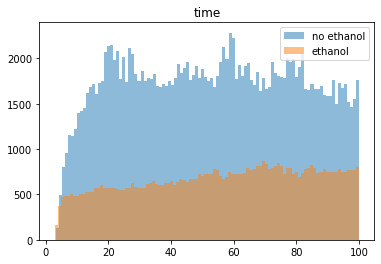

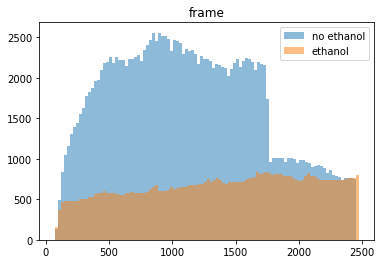

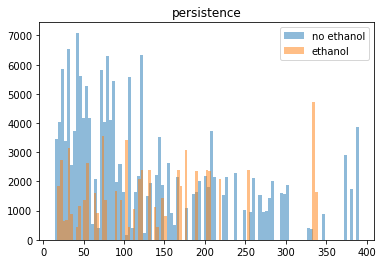

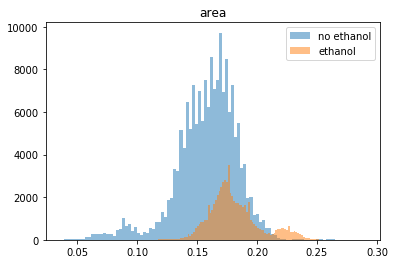

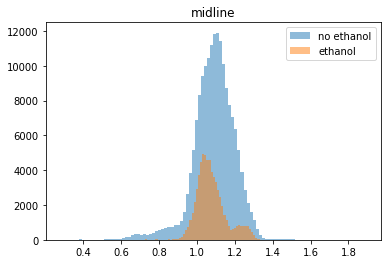

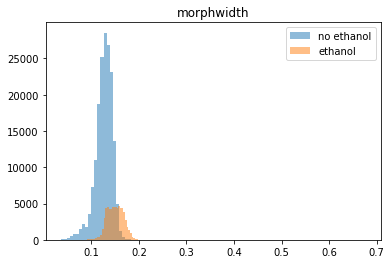

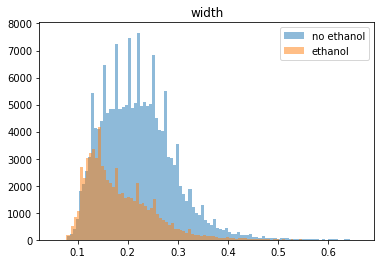

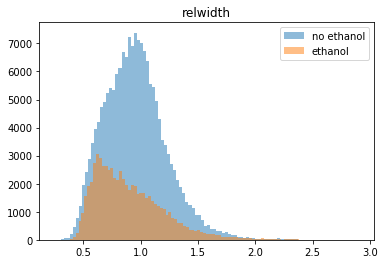

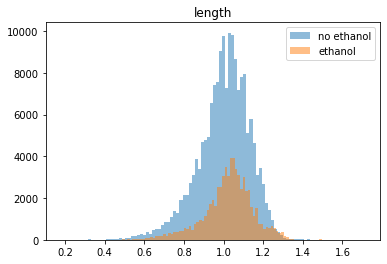

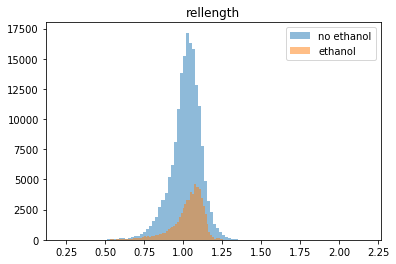

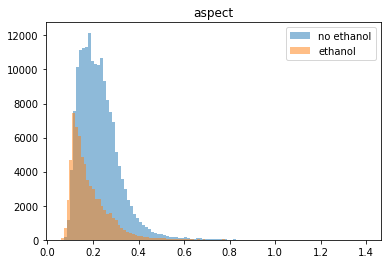

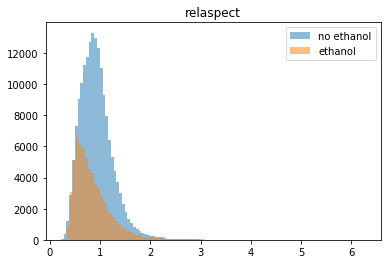

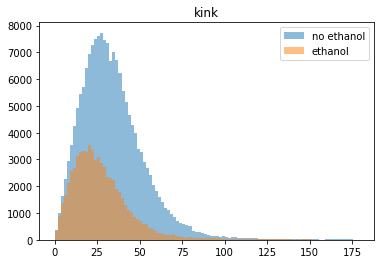

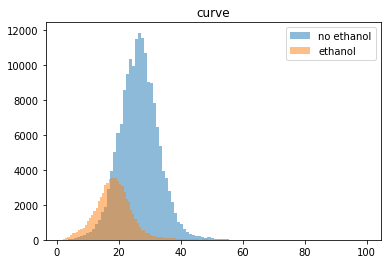

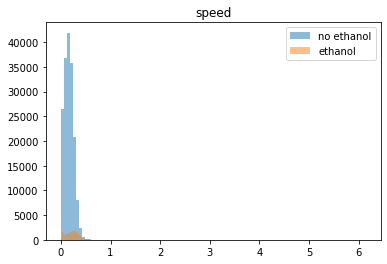

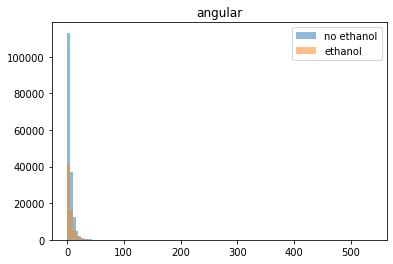

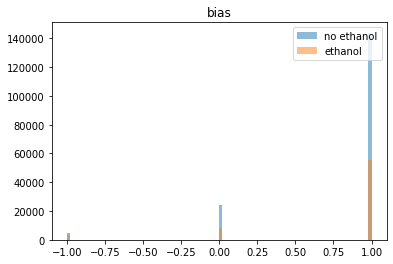

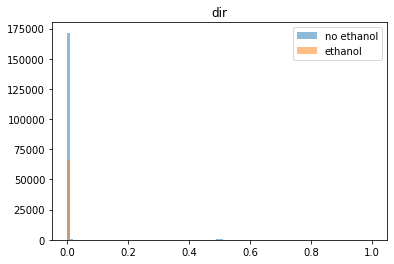

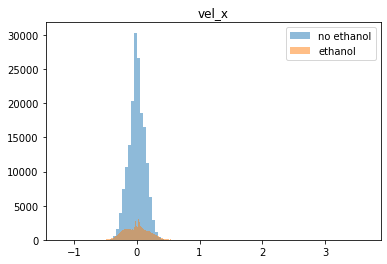

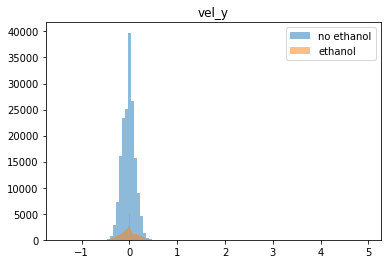

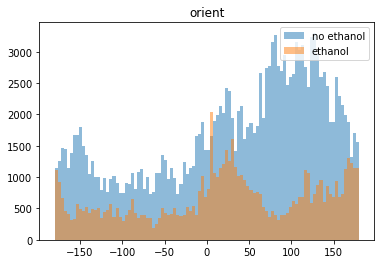

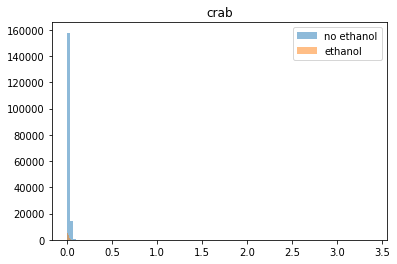

complete


In [10]:
for c in X_no.columns.values:
    plothist_2groups(X_no[c], X_etoh[c], 100, c)
print('complete')

observation of histogram

|feature|notes|keep/drop|outlier|
|---|---|---|---|
|time| same distribution for etoh vs non. more objects are being picked up over time|drop|no|
|frame|same distribution for frame #. not very informative because it's just similar data as time|drop|no
|persistence|how long had the object been tracked. skewed to the right because less objects would be tracked for longer period of time before the computer loses it.|explore|not serious|
|**area**|potential predictor of etoh. same distribution but etoh has peak lower than non etoh|keep|yes|
|**midline**|non etoh has a funny bump at the left. similar disrtribution other than that, though etoh has peak lower than no etoh|keep|yes|
|**morphwidth**|etoh has peak lower than no etoh. distribution seems similar. potential outliers|keep|yes|
|**width**|so far the biggest difference in peak. similar distribution|keep|yes|
|**relwidth**|etoh slightly lower, his replot|keep|yes|
|length|etoh slight higher|keep|yes, lower end|
|rellength|similar peak and dist|maybe remove|maybe, check|
|aspect|etoh lower peak, same dist|keep|check|
|relaspect|very slight lower peak, same dist|keep|check|
|kink|much lower in etoh, same dis|keep|yes|
|curve|the lowest in etoh compare to others, same dist, his replot|keep|check|
|speed|slightly lower peak, same dist, replot hist|keep|check|
|angular|can't tell, do stats, replot hist|keep|check|
|bias|probably need to be a mean value, etoh tends to go forward more than reverse, replot hist|keep, but transform, |check|
|dir|can't tell from the graph, regraph|keep for now|check|
|vel_x|doesn't seem to be different, replot hist|drop?|check|
|vel-y|doesn't seem to be different, replot hist|drop|check|
|orient|no diff|drop|check|
|crab|can't tell from this scale, replot hist|?|check|

redo some histograms with more fine tune / explore outlier
* morphwidth - outlier?
* width
* relwidth
* curve, speed, angular, bias, vel_x, vel_y, crab

In [53]:
X_no.columns

Index(['time', 'frame', 'persistence', 'area', 'midline', 'morphwidth',
       'width', 'relwidth', 'length', 'rellength', 'aspect', 'relaspect',
       'kink', 'curve', 'speed', 'angular', 'bias', 'dir', 'vel_x', 'vel_y',
       'orient', 'crab'],
      dtype='object')

In [ ]:
# build dataframe for plotting
graph_data = X_no.copy()
graph_data['etoh'] = np.tile('no', X_no.shape[0])
graph_data_etoh = X_etoh.copy()
graph_data_etoh['etoh'] = np.tile('etoh', X_etoh.shape[0])
graph_data = pd.concat([graph_data, graph_data_etoh])
del graph_data_etoh

### violin plot for outliers

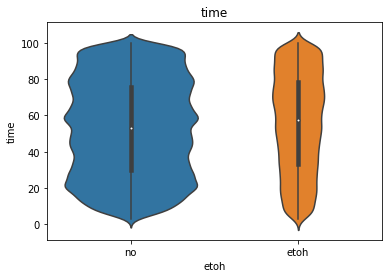

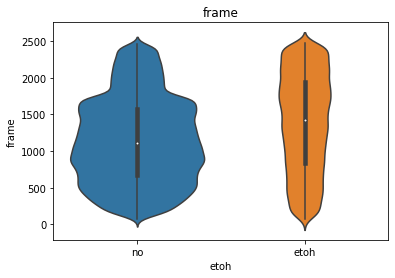

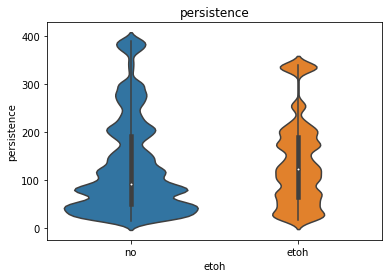

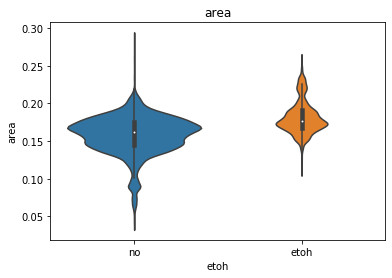

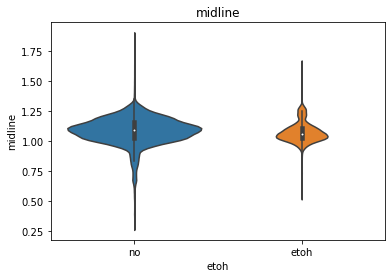

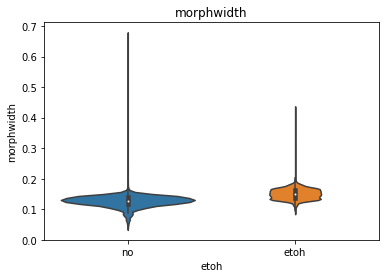

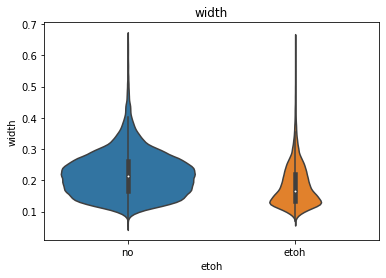

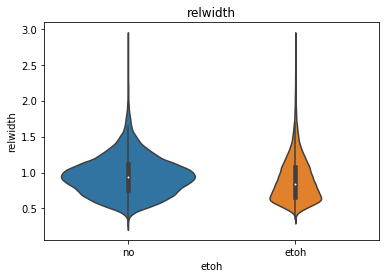

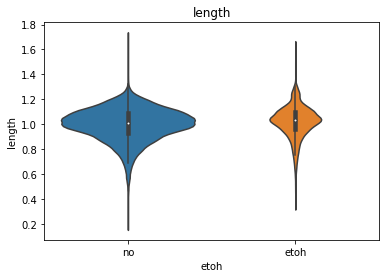

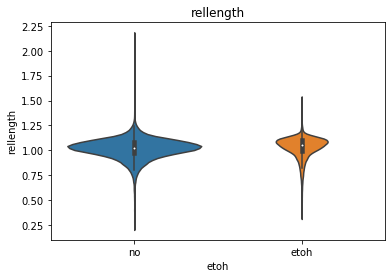

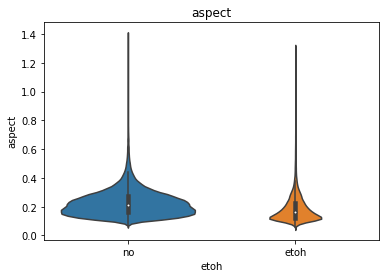

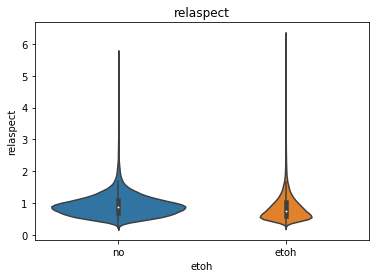

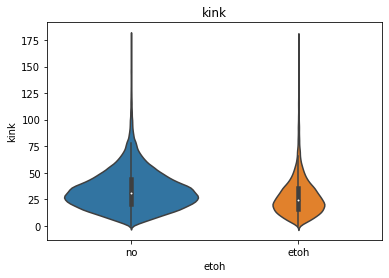

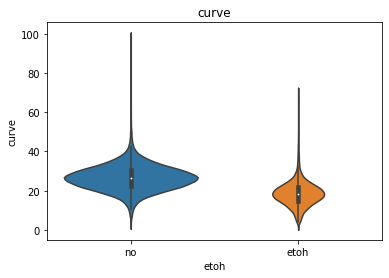

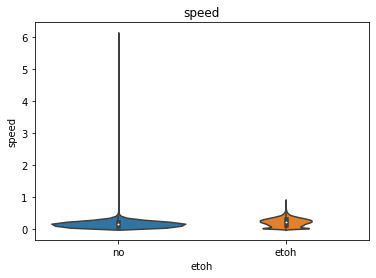

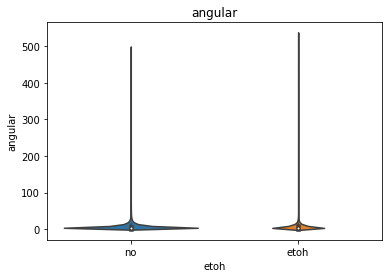

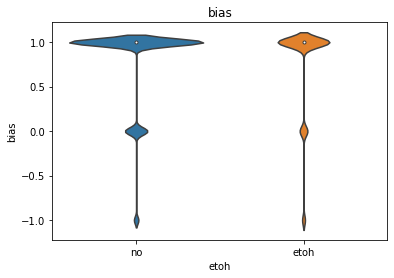

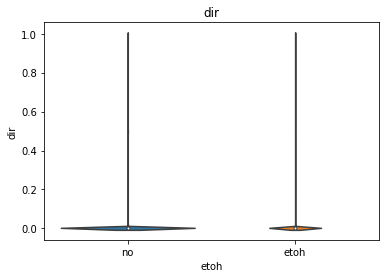

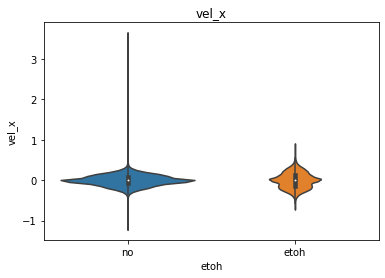

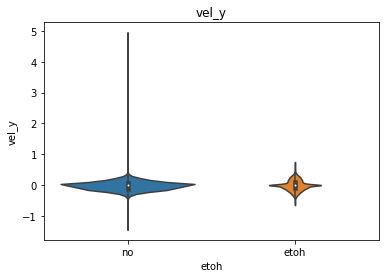

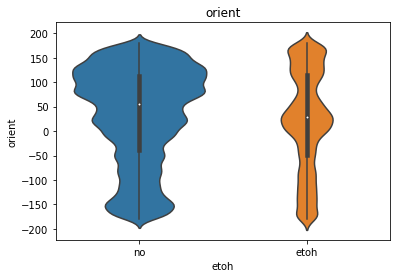

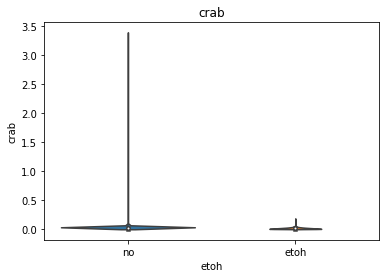

complete


In [55]:
for c in graph_data.columns.values[:-1]:
    plt.figure()
    sns.violinplot(y=c, x='etoh', data=graph_data, scale='count')
    plt.title(c)
    plt.show()
    plt.close()
print('complete')

redo some histograms with more fine tune / explore outlier
* morphwidth - outlier yes, look into which plates have those
* width - not so much outlier, but could correlate with morphwidth
* relwidth
* curve, 
* speed, - huge outlier. must remove
* angular - huge outlier, must remove
* bias, vel_x, vel_y, crab

Huge outliers for morphwidth, aspect, relaspect, speed, crab, angular, dir, vel_y

outlier only exist in 0mM: vel_y, vel_x, speed, crab

### clean outlier only exist in 0mM

In [84]:
def subplot_violin_generator(data):
    # plot subplot
    nrows_max = 7
    ncols_max = 2
    fig, axes = plt.subplots(nrows=nrows_max+1, 
                             ncols=ncols_max+1, 
                             figsize=(12,25))
    nrows = 0
    ncols = 0
    for c in a.columns.values[:-1]:
        sns.violinplot(y=c, x='etoh', data=data, scale='count', ax=axes[nrows,ncols])
        if nrows < nrows_max:
            nrows +=1
        elif nrows >= nrows_max:
            nrows = 0
            ncols +=1
    plt.show()

total outliers found: 168


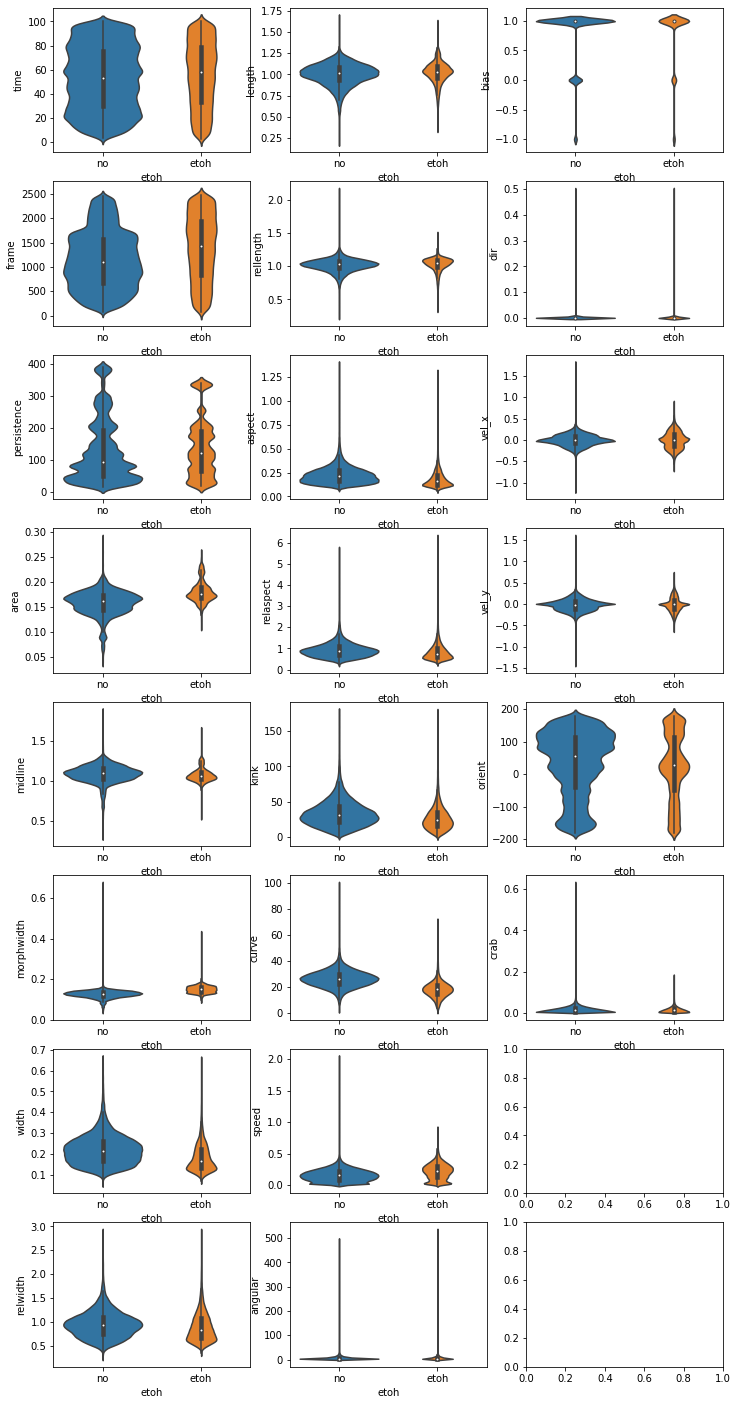

In [89]:
outlier = (graph_data['vel_y'] > 2) | (graph_data['vel_x'] > 2) | \
            (graph_data['speed'] > 3) | (graph_data['crab'] > 0.8) | \
            (graph_data['dir'] > 0.8)

print(f'total outliers found: {sum(outlier)} / {graph_data.shape[0]}')
a = graph_data.drop(index=graph_data.index[outlier].values)
subplot_violin_generator(a)

total outliers found: 267 / 239938


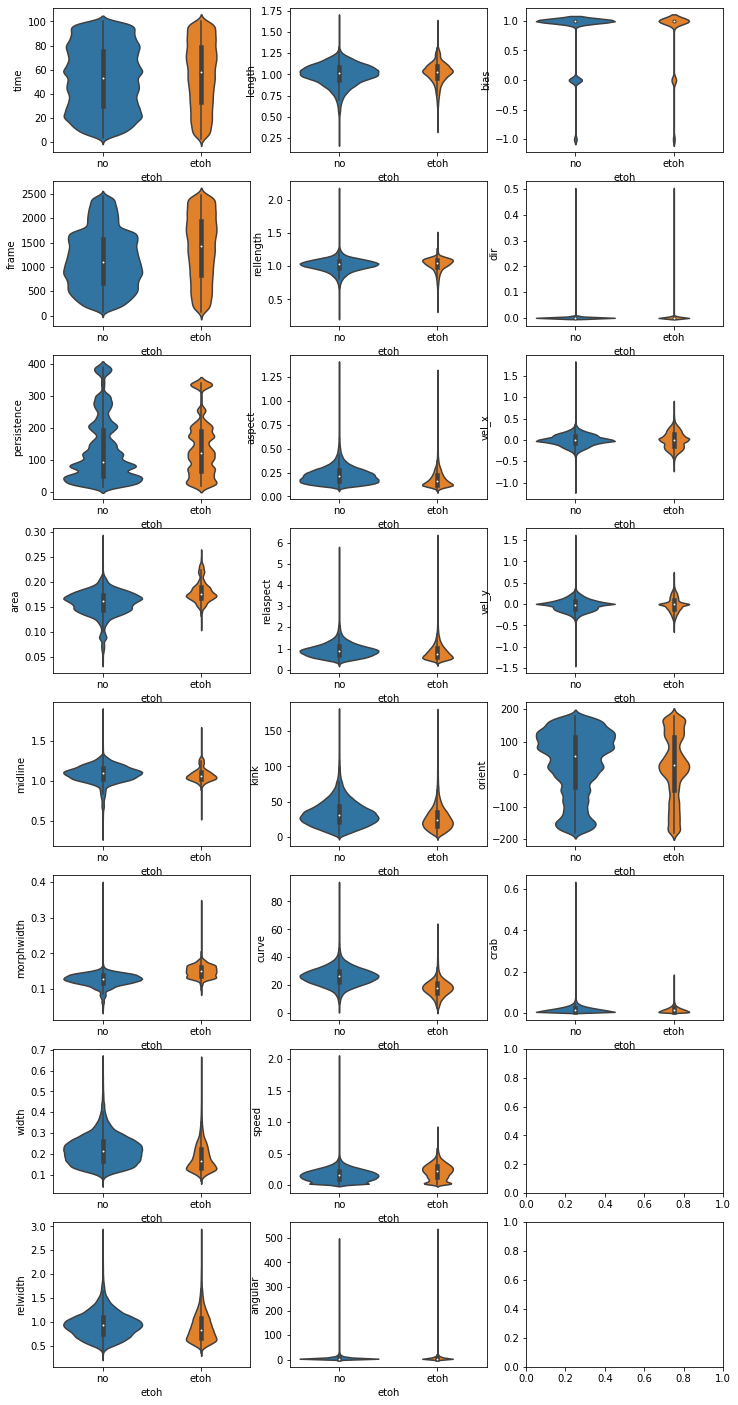

In [90]:
outlier = (graph_data['vel_y'] > 2) | (graph_data['vel_x'] > 2) | \
            (graph_data['speed'] > 3) | (graph_data['crab'] > 0.8) | \
            (graph_data['dir'] > 0.8) | (graph_data['morphwidth'] > 0.4)

print(f'total outliers found: {sum(outlier)} / {graph_data.shape[0]}')
a = graph_data.drop(index=graph_data.index[outlier].values)
subplot_violin_generator(a)

leave the data as is for now

questions
- are object has longer persistence has better predictive power?

## any time influence to features?

In [103]:
X_no.head()

,time,frame,persistence,area,midline,morphwidth,width,relwidth,length,rellength,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
66924,85.704,1517.0,130.4,0.140697,1.0504,0.1021,0.1971,0.830,1.0260,1.175,...,22.0,23.1,0.2512,6.9,1.0,0.0,-0.2059,-0.1438,40.9,0.0259
66925,85.751,1518.0,130.4,0.135594,1.0240,0.1047,0.1917,0.808,0.9882,1.132,...,21.6,22.1,0.2895,5.9,1.0,0.0,-0.2367,-0.1667,41.4,0.0313
66926,85.832,1519.0,130.4,0.134865,1.0594,0.0988,0.1890,0.796,1.0260,1.175,...,11.6,19.5,0.2253,1.9,1.0,0.0,-0.1823,-0.1323,41.5,0.0215
66927,85.913,1520.0,130.4,0.135594,1.0362,0.1002,0.1701,0.717,1.0044,1.151,...,17.8,22.5,0.1713,2.6,1.0,0.0,-0.1415,-0.0966,41.7,0.0219
66928,85.992,1521.0,130.4,0.135594,1.0256,0.1004,0.1620,0.683,1.0206,1.169,...,15.2,21.1,0.1463,2.4,1.0,0.0,-0.1078,-0.0988,41.9,0.0016


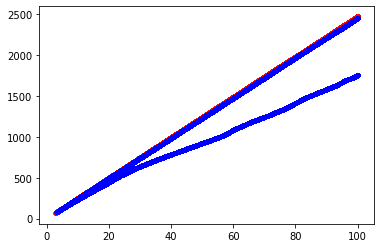

In [107]:
# plot time vs feature (scatter takes a long time
plt.figure()
plt.scatter(X_etoh['time'], 
            X_etoh['frame'], 
            marker='.', c='red')
plt.scatter(X_no['time'], 
            X_no['frame'], 
            marker='.', c='blue')
plt.show()
plt.close()

In [126]:
# TODO: need to make the color transparent
def subplot_scatter_bytime(X_etoh, X_no):
    # plot subplot
    nrows_max = 7
    ncols_max = 2
    fig, axes = plt.subplots(nrows=nrows_max+1, 
                             ncols=ncols_max+1, 
                             figsize=(12,25))
    nrows = 0
    ncols = 0
    for c in a.columns.values[:-1]:
        axes[nrows,ncols].scatter(X_etoh['time'], 
                                  X_etoh[c], 
                                  marker='.', c='red')
        axes[nrows,ncols].scatter(X_no['time'], 
                                  X_no[c], 
                                  marker='.', c='blue')
        axes[nrows,ncols].set_title(c)
        if nrows < nrows_max:
            nrows +=1
        elif nrows >= nrows_max:
            nrows = 0
            ncols +=1
    plt.show()
    plt.close()

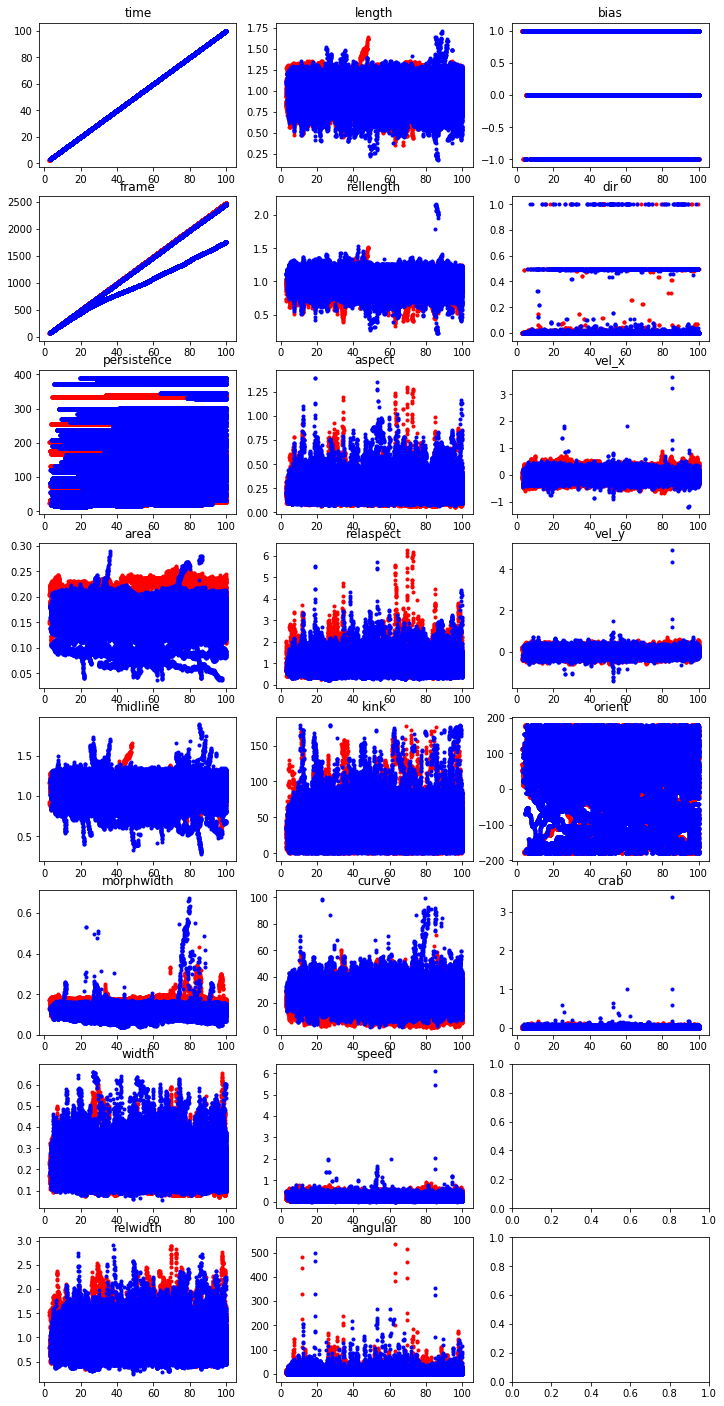

In [127]:
subplot_scatter_bytime(X_etoh, X_no)

### corelation

In [143]:
cor = X_etoh.corr()
cor

,time,frame,persistence,area,midline,morphwidth,width,relwidth,length,rellength,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
time,1.000000,0.999998,0.067478,0.015525,0.024223,0.048932,-0.025858,-0.057281,0.055173,0.063970,...,-0.018814,-0.065925,-0.103835,-0.050339,-0.117915,0.010259,-0.065243,0.001554,-0.101338,-0.067371
frame,0.999998,1.000000,0.067461,0.015545,0.024309,0.048836,-0.025906,-0.057342,0.055226,0.063977,...,-0.018847,-0.066051,-0.103946,-0.050358,-0.117915,0.010264,-0.065176,0.001368,-0.101639,-0.067422
persistence,0.067478,0.067461,1.000000,-0.339028,-0.310554,-0.217919,-0.164726,-0.206730,-0.147153,0.188410,...,-0.095720,-0.157717,-0.224697,-0.113050,-0.065897,-0.010222,-0.037592,0.038114,-0.045369,-0.063097
area,0.015525,0.015545,-0.339028,1.000000,0.779326,0.653041,0.239560,0.143668,0.417261,-0.059341,...,0.076688,0.119532,0.253477,0.086469,0.070490,0.007959,0.023364,-0.049986,0.115378,0.066098
midline,0.024223,0.024309,-0.310554,0.779326,1.000000,0.191631,0.065382,-0.023118,0.654387,0.183665,...,-0.050095,-0.056350,0.211771,0.002977,0.051378,0.006220,-0.063630,-0.002317,0.152796,-0.022995
morphwidth,0.048932,0.048836,-0.217919,0.653041,0.191631,1.000000,0.268403,0.230547,0.009363,-0.228874,...,0.145983,0.174806,0.119260,0.104620,0.090805,0.010327,0.088794,-0.059819,0.239025,0.063032
width,-0.025858,-0.025906,-0.164726,0.239560,0.065382,0.268403,1.000000,0.938427,-0.427820,-0.559586,...,0.505129,0.510822,0.108001,0.407660,0.024587,0.023204,0.043008,-0.107984,-0.021794,0.350418
relwidth,-0.057281,-0.057342,-0.206730,0.143668,-0.023118,0.230547,0.938427,1.000000,-0.428933,-0.585033,...,0.456742,0.455435,0.092165,0.383708,0.059169,0.015365,0.033390,-0.084904,-0.006725,0.310348
length,0.055173,0.055226,-0.147153,0.417261,0.654387,0.009363,-0.427820,-0.428933,1.000000,0.758931,...,-0.344711,-0.320977,0.104086,-0.204635,0.037623,-0.009143,-0.062882,0.082249,0.154296,-0.237758
rellength,0.063970,0.063977,0.188410,-0.059341,0.183665,-0.228874,-0.559586,-0.585033,0.758931,1.000000,...,-0.437663,-0.397806,-0.009889,-0.283135,0.019690,-0.022825,-0.004643,0.085826,0.051854,-0.282007


<Figure size 432x288 with 0 Axes>

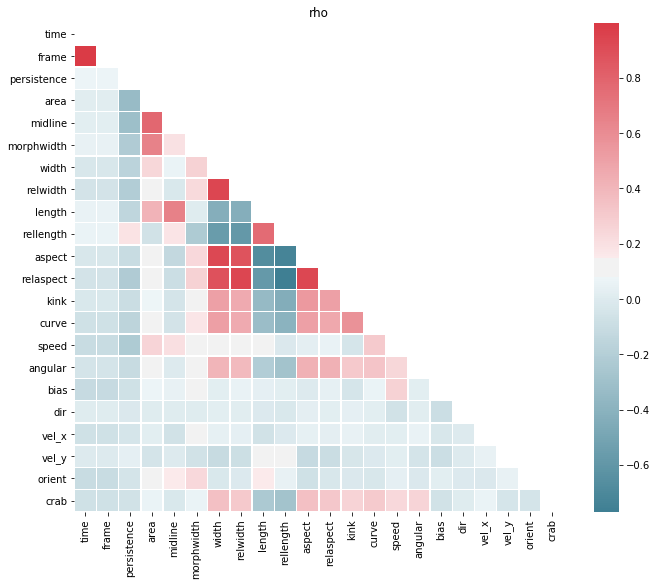

In [154]:
bs.heatmap_corr(cor)

### sample size differences

In [37]:
print('shape of y')
print(y.shape)
print('shape of x')
print(X.shape)

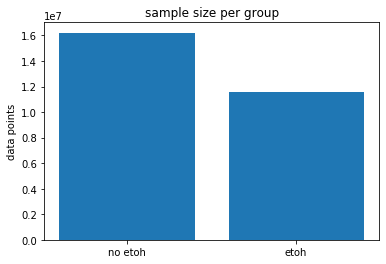

In [37]:
# look at absolute sample sizes
y_group_counts = y['etoh'].value_counts()
etoh_name = y_group_counts.index.values
group_count = y_group_counts.values

plt.figure()
plt.bar(etoh_name, group_count)
plt.ylabel('data points')
plt.xticks(etoh_name, ('no etoh','etoh'))
plt.title('sample size per group')
plt.show()

Seems there is inbalance in sample size. Would need to be balanced

In [ ]:
# load data
y = pd.read_csv(os.path.join(pCapstone, 'nutcracker_y.csv'))
X = pd.read_csv(os.path.join(pCapstone, 'nutcracker_X.csv'))

In [9]:
# take a look at dataframe of y
y.head()


,etoh
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [13]:
# need to make it integer
y['etoh'] = y['etoh'].astype(int)

In [15]:
# save this all in pickle for faster loading
pickle.dump(y, open(os.path.join(pCapstone, 'nutcracker_y.pickle'),'wb'))

In [16]:
# take a look at dataframe
X.head()

,time,frame,persistence,area,midline,morphwidth,width,relwidth,length,rellength,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,10.147,459.0,35.7,0.330237,1.9743,0.1502,0.6183,1.268,1.6281,1.065,...,46.8,30.9,0.3787,14.9,1.0,0.0,-0.0921,-0.3674,86.3,0.0685
1,10.167,460.0,35.7,0.334611,1.9586,0.1527,0.6129,1.257,1.6335,1.069,...,46.4,30.9,0.4071,17.9,1.0,0.0,-0.0983,-0.3950,86.0,0.0702
2,10.189,461.0,35.7,0.333153,1.9296,0.1538,0.6102,1.251,1.6902,1.106,...,45.5,31.2,0.4174,19.9,1.0,0.0,-0.1032,-0.4044,85.6,0.0719
3,10.204,462.0,35.7,0.338256,1.9235,0.1566,0.6075,1.246,1.6389,1.073,...,45.3,30.6,0.4143,20.5,1.0,0.0,-0.1047,-0.4008,85.1,0.0700
4,10.231,463.0,35.7,0.333153,1.9449,0.1536,0.6021,1.235,1.6659,1.090,...,41.2,30.0,0.3748,18.7,1.0,0.0,-0.0889,-0.3641,84.6,0.0542


In [18]:
# save in pickle file for faster loading
pickle.dump(X, open(os.path.join(pCapstone, 'nutcracker_X.pickle'),'wb'))

OverflowError: cannot serialize a bytes object larger than 4 GiB

can not save pickle file larger than 4GB. Perhaps do some sampling first


In [22]:
# how many rows of data?
y.shape

(64851052, 1)

65 million rows of data. Let's start with a sample of 1M rows per group

## take 1M sample per group for testing

In [23]:
# take a smaller sample
# put a random seed
np.random.seed(318)

In [24]:
# randomly pick index of 1M y = 0, and 1M y=1
# get y=0 index
y.index

RangeIndex(start=0, stop=64851052, step=1)

index of y is an iterable from 0 to end, step=1. proceed.

In [34]:
# create index array
y_ind = np.array(y.index)
y_ind

array([       0,        1,        2, ..., 64851049, 64851050, 64851051])

In [57]:
# randome sample index
# get y=1
ethanol = y.values == 1
ethanol[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [58]:
# simply the array
ethanol = ethanol.transpose()
# take the array out to level 1
ethanol = ethanol[0]
ethanol

array([False, False, False, ..., False, False, False])

In [59]:
# get index for ethanol group
y_ind_etoh = y_ind[ethanol]
y_ind_etoh

array([  122680,   122681,   122682, ..., 64615351, 64615352, 64615353])

In [60]:
# get index for no group
y_ind_noetoh = y_ind[~ethanol]
y_ind_noetoh

array([       0,        1,        2, ..., 64851049, 64851050, 64851051])

In [68]:
identifier_df = pd.read_csv(os.path.join(pCapstone, 'nutcracker_identifier.csv'))

In [ ]:
output_csv_name = 'nutcracker_sample_1Meach.csv'
n_sample = 1000000
np.random.seed(318)
X_sample = []
for i, ind_array in enumerate([y_ind_noetoh, y_ind_etoh]):
    # take random 1M for each group from X
    size_array = ind_array.shape[0]
    print(f'taking {n_sample} of {size_array} from ethanol={i}')
    random_ind = np.random.choice(size_array, n_sample, replace=False)
    # index random index to the index array
    ind_choice = ind_array[random_ind]
    ind_choice.shape
    # double check if this random choice will index to right group
    ind_correct = all(y.iloc[ind_choice] == i)
    print(f'all random choices found data from the correct ethanol group: {ind_correct}')
    if not ind_correct:
        assert False, 'random choice incorrect'
    # take sample
    print('taking sample from X')
    sample_x = X.iloc[ind_choice,:]
    # get from identifer
    print('taking sample from identifers')
    sample_identifer = identifier_df.iloc[ind_choice,:]
    # get from y
    print('taking sample from y')
    sample_y = y.iloc[ind_choice,:]
    # correct data type
    sample_y['etoh'].astype(int)
    # combine in one array
    print('combining arrays')
    sample_df = pd.concat([sample_y, sample_identifer, sample_x], axis=1)
    # add to list
    print('putting array in list')
    X_sample.append(sample_df)

# combine
print('combine samples from all groups')
df = pd.concat(X_sample, axis=0, ignore_index=True)
# validate concat correct
assert (df.shape[0] == n_sample * 2), 'resulting dataframe does not have expected n_sample * 2 length'

The above is added to package BrainStationLib.ETL.SampleReduce.py as nutcracker_reducesample. Perform the same as below:

In [ ]:
from BrainStationLib.ETL.SampleReduce import nutcracker_reduce_sample
randomseed = 318
n_sample = 1000000
nutcracker_reducesample(X, y, identifier_df, n_sample, randomseed)

In [84]:
# store in csv
print('stored in csv')
df.to_csv(os.path.join(pCapstone, output_csv_name), index=False)

store in csv


In [85]:
# load data and check
data = pd.read_csv(os.path.join(pCapstone, output_csv_name))
data

,etoh,id,mwtid,time,frame,persistence,area,midline,morphwidth,width,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,0,325.0,5562.0,30.660,211.0,29.4,0.121014,0.9811,0.1023,0.2106,...,46.3,29.3,0.1956,23.9,1.0,0.0,-0.1828,-0.0694,15.4,0.0185
1,0,29.0,605.0,14.027,229.0,17.9,0.242028,1.3200,0.1689,0.4671,...,61.9,30.8,0.3136,2.7,1.0,0.0,0.0105,-0.3134,92.2,0.0016
2,0,118.0,725.0,69.963,1727.0,238.8,0.184437,1.2996,0.1221,0.2052,...,14.3,21.7,0.2837,2.0,1.0,0.0,-0.2822,-0.0294,-173.1,0.0045
3,0,537.0,4288.0,37.299,436.0,26.4,0.044469,0.5986,0.0548,0.1377,...,20.0,26.5,0.1934,17.8,1.0,0.0,-0.1910,0.0299,168.5,0.0089
4,0,209.0,4301.0,33.371,227.0,23.7,0.172044,1.2023,0.1316,0.3915,...,44.6,27.2,0.1128,1.9,1.0,0.0,0.1125,-0.0083,6.4,0.0207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1,42.0,3399.0,6.329,79.0,28.9,0.200475,1.1993,0.1641,0.2916,...,77.1,16.7,0.1239,5.7,1.0,0.0,0.0375,-0.1181,109.1,0.0033
1999996,1,87.0,6059.0,35.397,446.0,22.8,0.180063,1.3499,0.1036,0.1728,...,41.7,19.7,0.2472,7.2,1.0,0.0,-0.2259,-0.1004,21.6,0.0101
1999997,1,28.0,6276.0,23.505,288.0,77.0,0.202662,1.2996,0.1458,0.1539,...,27.8,10.5,0.1396,3.8,1.0,0.0,-0.1363,0.0305,-10.9,0.0043
1999998,1,35.0,2362.0,45.360,602.0,124.4,0.163296,1.2311,0.1298,0.1026,...,23.8,8.1,0.0244,0.7,0.0,0.0,-0.0169,0.0175,-33.5,0.0053


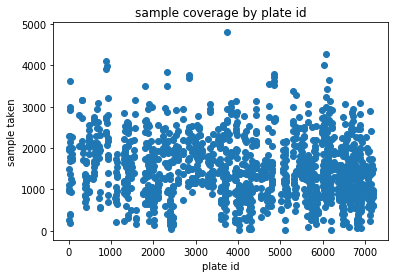

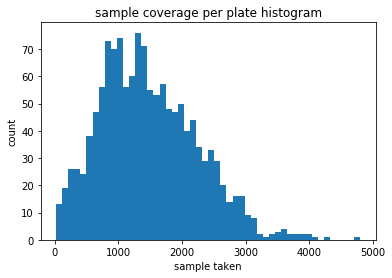

In [97]:
# check distribution of mwtid to see any sampling biases
sample_plate_coverage = data['mwtid'].value_counts()

# plot scatter
plt.figure()
plt.scatter(sample_plate_coverage.index.values, sample_plate_coverage.values)
plt.title('sample coverage by plate id')
plt.xlabel('plate id')
plt.ylabel('sample taken')
plt.show()

# plot histogram
plt.figure()
plt.hist(sample_plate_coverage.values, bins=50)
plt.title('sample coverage per plate histogram')
plt.ylabel('count')
plt.xlabel('sample taken')
plt.show()

## Quick 1M data sample EDA



June 13, 2020

Here we reset the workspace to clear up memory, reload modules so that previous of this notebooke won't confuse the repeated analysis process below. 

* `%reset` clears all user defined variable. [See here for documenation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-reset)
* `reload` reload my packages / modules [see documentation](https://docs.python.org/3.4/library/importlib.html#importlib.reload), [simple how to](https://www.geeksforgeeks.org/reloading-modules-python/), and more careful, compatible with IDE method [here](https://www.oreilly.com/library/view/python-cookbook/0596001673/ch14s02.html)


In [117]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Checked Activity Monitor. After execution of `%reset`, memory consumption of python dropped from GB to MB. Reset seems to also reset all the imported libraries.

In [1]:
# redefine
pCapstone = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data'

In [2]:
# import library
import sys, os, pickle, importlib
import numpy as np
import pandas as pd


In [3]:
# define local path to the package (can give multiple paths in the list)
pylibrary = ['/Users/connylin/Dropbox/Code/proj/brainstation_capstone/BrainStationLib']
# add package paths to system search paths
for path in pylibrary:
    # import local functions
    if path not in sys.path:
        sys.path.insert(1, path)

In [4]:
# import data
data = pd.read_csv(os.path.join(pCapstone, 'nutcracker_sample_1Meach.csv'))

In [5]:
data.head()

,etoh,id,mwtid,time,frame,persistence,area,midline,morphwidth,width,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,0,325.0,5562.0,30.660,211.0,29.4,0.121014,0.9811,0.1023,0.2106,...,46.3,29.3,0.1956,23.9,1.0,0.0,-0.1828,-0.0694,15.4,0.0185
1,0,29.0,605.0,14.027,229.0,17.9,0.242028,1.3200,0.1689,0.4671,...,61.9,30.8,0.3136,2.7,1.0,0.0,0.0105,-0.3134,92.2,0.0016
2,0,118.0,725.0,69.963,1727.0,238.8,0.184437,1.2996,0.1221,0.2052,...,14.3,21.7,0.2837,2.0,1.0,0.0,-0.2822,-0.0294,-173.1,0.0045
3,0,537.0,4288.0,37.299,436.0,26.4,0.044469,0.5986,0.0548,0.1377,...,20.0,26.5,0.1934,17.8,1.0,0.0,-0.1910,0.0299,168.5,0.0089
4,0,209.0,4301.0,33.371,227.0,23.7,0.172044,1.2023,0.1316,0.3915,...,44.6,27.2,0.1128,1.9,1.0,0.0,0.1125,-0.0083,6.4,0.0207


In [6]:
def m_reload(package_name):
    for k,v in sys.modules.items():
        if k.startswith(package_name):
            importlib.reload(v)

In [7]:
m_reload('get_variablenames')

In [8]:
# get standard column names
from BrainStationLib.ETL.columns import get_variablenames
column_names = data.columns.values
column_x, column_y, column_id = nutcracker_get_variablenames()

/Users/connylin/Dropbox/Code/proj/brainstation_capstone/BrainStationLib/ETL/columns.py:5: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  column_names = np.delete(column_names, column_names == y_column)
/Users/connylin/Dropbox/Code/proj/brainstation_capstone/BrainStationLib/ETL/columns.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  column_names = np.delete(column_names, column_names == id_column)
/Users/connylin/Dropbox/Code/proj/brainstation_capstone/BrainStationLib/ETL/columns.py:6: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  column_names = np.delete(column_names, column_names == id_column)


In [133]:
# NOT DONE: reload packages
import sys
print('check if sys in module')
print('sys' in sys.modules.keys())
module_name = 'BrainStationLib'
print(f'check if {module_name} in module')
print(f'{module_name}' in sys.modules.keys())

import importlib
importlib.reload(module_name)

check if sys in module
True
check if BrainStationLib in module
True


TypeError: reload() argument must be a module

## final data treatment

In [ ]:
# start here
# use df.nlargest to find the problem plate

## feature eng / PCA

* Recommender systems: TfidVectorizer - can do similarity for text data

In [ ]:
## explore features

## see trouble plates

# Machine Learning

* can use recommender system - cosine similarities to recommended which gene to test on? Lots of variations people played with recommender systems.



## prepare data

In [ ]:
# load 
data = pd.read_csv(os.path.join(pCapstone, 'nutcracker_sample_1Meach.csv'))

In [ ]:
# column names
column_y = ['etoh']
column_id = ['id','mwtid','frame']
column_x = ['time', 'persistence', 'area', 'midline', 'morphwidth',
'width', 'relwidth', 'length', 'rellength', 'aspect', 'relaspect',
'kink', 'curve', 'speed', 'angular', 'bias', 'dir', 'vel_x',
'vel_y', 'orient', 'crab']

In [22]:
# prepare y data
y = data[column_y].values
y = y.transpose()
y = y[0]
y

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
# prepare X data
X = data[column_x].values
X

array([[ 3.06600e+01,  2.94000e+01,  1.21014e-01, ..., -6.94000e-02,
         1.54000e+01,  1.85000e-02],
       [ 1.40270e+01,  1.79000e+01,  2.42028e-01, ..., -3.13400e-01,
         9.22000e+01,  1.60000e-03],
       [ 6.99630e+01,  2.38800e+02,  1.84437e-01, ..., -2.94000e-02,
        -1.73100e+02,  4.50000e-03],
       ...,
       [ 2.35050e+01,  7.70000e+01,  2.02662e-01, ...,  3.05000e-02,
        -1.09000e+01,  4.30000e-03],
       [ 4.53600e+01,  1.24400e+02,  1.63296e-01, ...,  1.75000e-02,
        -3.35000e+01,  5.30000e-03],
       [ 7.85960e+01,  7.55000e+01,  1.50903e-01, ...,  1.13000e-02,
        -1.27400e+02,  2.29000e-02]])

In [31]:
# split test/train set
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 318
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

In [32]:
# scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Machine learning to try
* logistic regression (OLS)
* decision tree
* Bagging/random forest
* KNN
* SVM
* custering
* NN - recurrent NN (RNN)
* LSTM
* Market Basket Analysis - associative learning

## pipeline
* model eval
* hyper parameter tuning
* pipeline
* boosting
